In [1]:
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [2]:
from clones.data.experiments import Experiment

In [3]:
# load experiment
experiment = Experiment('../../../data/drosophila/')

# Train annotator for each stack

In [4]:
start = time()
for stack_id in (28, 29, 30, 31, 55, 56):
    stack = experiment.load_stack(stack_id, True)
    stack.train_annotator('r', save=True, sampler_type='radial', sampler_kwargs=dict(depth=1.), max_num_components=15)
    print('Finished stack {:d} at {:0.2f}'.format(stack_id, time()-start))
stop = time()
print(stop-start)

Finished stack 28 at 145.92
Finished stack 29 at 407.59
Finished stack 30 at 613.78
Finished stack 31 at 707.00
Finished stack 55 at 954.72
Finished stack 56 at 1121.86
1121.8556010723114


# Update processed measurement data

In [12]:
for stack_id in (28, 29, 30, 31, 55, 56):
    stack = experiment.load_stack(stack_id, True)
    for layer_id in range(stack.depth):
        layer = stack.load_layer(layer_id, process=True)
        layer.save(processed_data=True)
    print(stack_id, 'done')

28 done
29 done
30 done
31 done
55 done
56 done


In [ ]:
for stack_id in (28, 29, 30, 31, 55, 56):
    stack = experiment.load_stack(stack_id, True)


In [6]:
data = experiment.aggregate_measurements(selected_only=True, exclude_boundary=False)

In [10]:
data = data[~data.manual_label.isna()]

In [13]:
data.groupby('genotype')['genotype'].count()

genotype
0    1566
1    2259
2     717
Name: genotype, dtype: int64

In [14]:
data.groupby('manual_label')['manual_label'].count()

manual_label
0.0    1527
1.0    1974
2.0    1041
Name: manual_label, dtype: int64

In [16]:
(data.manual_label == data.genotype).sum() / len(data)

0.880449141347424

In [18]:
d = data[~data.boundary]
(d.manual_label == d.genotype).sum() / len(d)

0.9130434782608695

In [44]:
labels = sil.df.set_index(['layer', 'id'])['label']

In [63]:
matched = stack_data.join(labels.reindex(stack_data.index))

In [32]:
(sil.df[['id', 'label']]

SyntaxError: unexpected EOF while parsing (<ipython-input-32-8a1af3a24728>, line 1)

In [31]:
layer.data.merge, how='outer', left_on='segment_id', right_on='id')

,segment_id,centroid_x,centroid_y,r,g,b,r_std,g_std,b_std,pixel_count,...,r_radial,sampling_radius,genotype,celltype,boundary,concurrent_w,concurrent_h,concurrent_m,id,label
0,28.0,644.203125,2032.140625,0.236244,0.219466,0.326711,0.068045,0.124060,0.134964,320.0,...,0.245069,19.0,2.0,w,False,True,True,False,28.0,H
1,30.0,1863.794721,2028.585044,0.106784,0.060586,0.270439,0.044508,0.063692,0.135808,682.0,...,0.137806,19.0,1.0,h,False,False,True,False,NaN,NaN
2,43.0,1618.633039,2011.601513,0.184625,0.089208,0.237774,0.067212,0.078269,0.081679,793.0,...,0.176446,19.0,1.0,h,False,False,True,True,43.0,H
3,43.0,1618.633039,2011.601513,0.184625,0.089208,0.237774,0.067212,0.078269,0.081679,793.0,...,0.176446,19.0,1.0,h,False,False,True,True,43.0,H
4,147.0,1308.308707,1934.350923,0.200476,0.260906,0.180343,0.056692,0.129196,0.060044,379.0,...,0.192909,32.0,2.0,w,True,True,True,True,147.0,H
5,1265.0,1478.537713,739.888078,0.152544,0.220552,0.261081,0.060838,0.125506,0.181377,822.0,...,0.114116,44.0,1.0,h,False,False,True,True,1265.0,W
6,1265.0,1478.537713,739.888078,0.152544,0.220552,0.261081,0.060838,0.125506,0.181377,822.0,...,0.114116,44.0,1.0,h,False,False,True,True,1265.0,M
7,1266.0,1242.946886,735.890110,0.129618,0.138858,0.213197,0.047037,0.095119,0.086338,546.0,...,0.181271,38.0,1.0,h,False,True,True,True,1266.0,M
8,1267.0,620.867769,734.870947,0.075018,0.071699,0.206021,0.037507,0.071489,0.144910,1573.0,...,0.062025,9.0,1.0,h,False,True,True,True,NaN,NaN
9,1268.0,170.378173,739.805838,0.129609,0.078777,0.298829,0.052266,0.074422,0.220894,788.0,...,0.109921,10.0,1.0,h,False,False,True,False,NaN,NaN


In [13]:
stack = experiment.load_stack(29, True)

In [19]:
layer = stack[1]

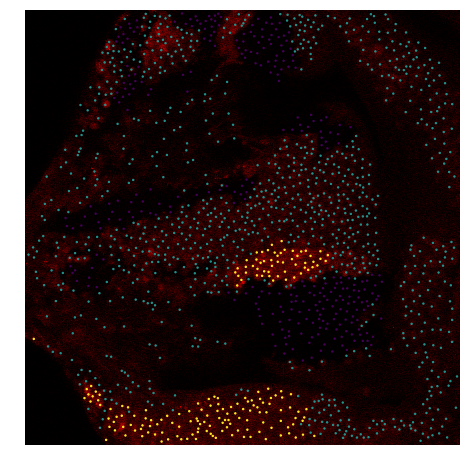

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
_ = layer.get_channel('r').show(ax=ax, cmap='r', segments=False)
_ = ax.scatter(*layer.data[layer.xykey].values.T, c=layer.data.genotype, s=2)

In [122]:
selector = layer.train_annotator('r', max_num_components=10, sampler_type='radial', sampler_kwargs=dict(depth=0.5))

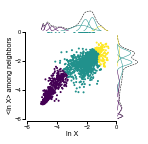

In [123]:
_ = layer.annotator.classifier.plot_bivariate_data(s=1)

In [126]:
layer.apply_annotation('genotype_layer_only', sampler_type='radial', sampler_kwargs=dict(depth=0.5))
#layer.apply_annotation('genotype_layer_only', sampler_type='community', sampler_kwargs=dict(depth=1))

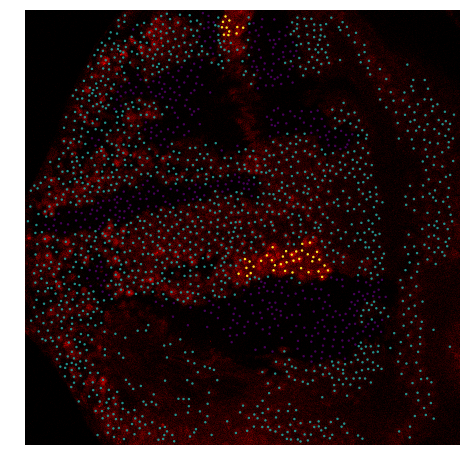

In [127]:
fig, ax = plt.subplots(figsize=(8, 8))
_ = layer.get_channel('r').show(ax=ax, cmap='r', segments=False)
_ = ax.scatter(*layer.graph.node_positions_arr.T, c=layer.data.genotype_layer_only, s=2)

array([2, 2, 2, ..., 2, 2, 2])

In [151]:
layer.annotator.classifier.model.bounds

array([-5.03548058, -0.60256241])

In [146]:
univariate_classifier = layer.annotator.classifier[0]

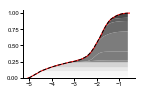

In [143]:
layer.annotator.classifier.plot_cdfs()

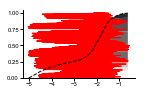

In [140]:
univariate_classifier.plot_cdfs()

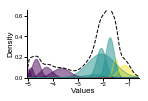

In [141]:
univariate_classifier.plot_pdfs()

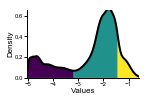

In [142]:
univariate_classifier.plot_pdf()